In [1]:
import os
import glob
import random

import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import sys
sys.path.insert(0, "..")

from helper import get_mask, get_pivot_table

In [2]:
dataframe_path = "../../Dataset/uw-madison-gi-tract-image-segmentation/train.csv"
img_paths = glob.glob("../../Dataset/uw-madison-gi-tract-image-segmentation/train/*/*/scans/*.png")
pivot_df = get_pivot_table(dataframe_path)

In [3]:
path = img_paths[0]

img = cv2.imread(path, -1)
mask = get_mask(path, pivot_df)

In [4]:
print(img.shape, mask.shape)

(266, 266) (266, 266, 3)


In [5]:
img_to_plot = list()
for img_path in tqdm(img_paths):
    #img = cv2.imread(img_path, -1)
    mask = get_mask(img_path, pivot_df)
    if mask[:,:].sum() > 0:
        img_to_plot.append(img_path)
print(mask.shape)

100%|███████████████████████████████████████████████████████████████████████████| 38496/38496 [01:12<00:00, 531.63it/s]

(266, 266, 3)


In [6]:
def plot_1d_img_3d_mask(img, mask):
    plt.figure(figsize=(8,8))
    plt_img = img.copy()
    plt_img = np.expand_dims(plt_img, axis=-1)
    plt_img = np.repeat(plt_img, axis=-1, repeats=3)
    print(plt_img.shape, mask.shape)
    plt_img[mask>0] = 255
    plt.imshow(plt_img)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(266, 266, 3) (266, 266, 3)


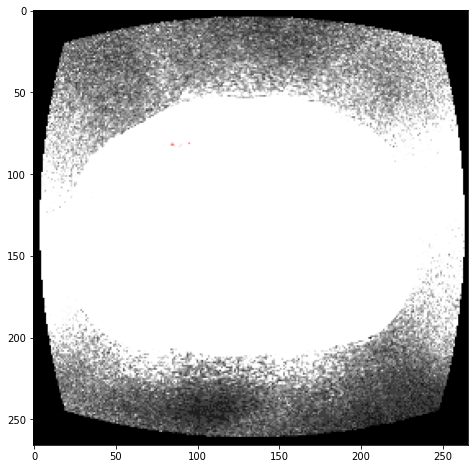

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(266, 266, 3) (266, 266, 3)


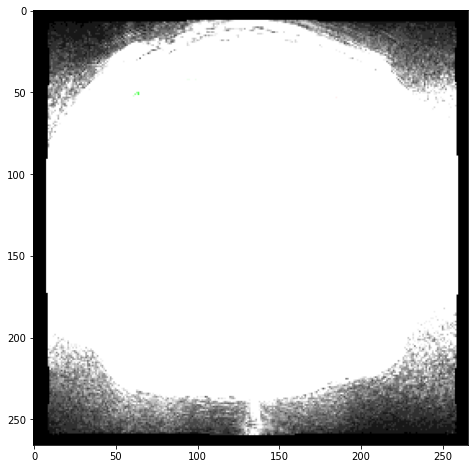

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(310, 360, 3) (310, 360, 3)


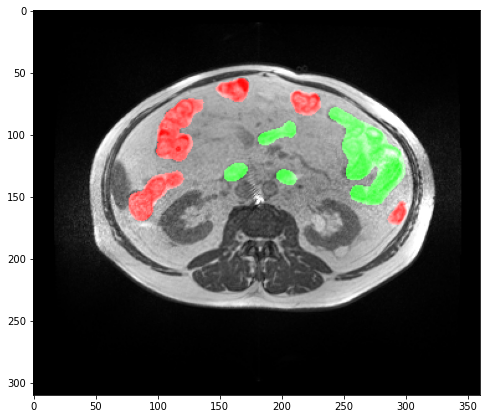

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(310, 360, 3) (310, 360, 3)


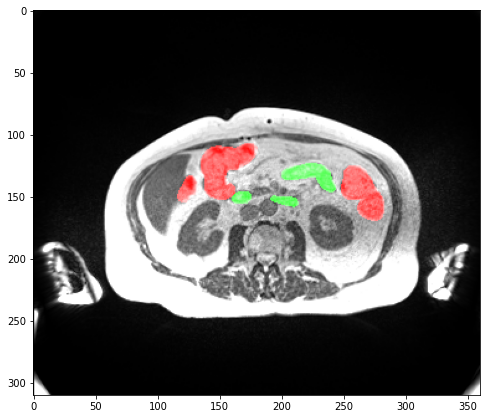

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(266, 266, 3) (266, 266, 3)


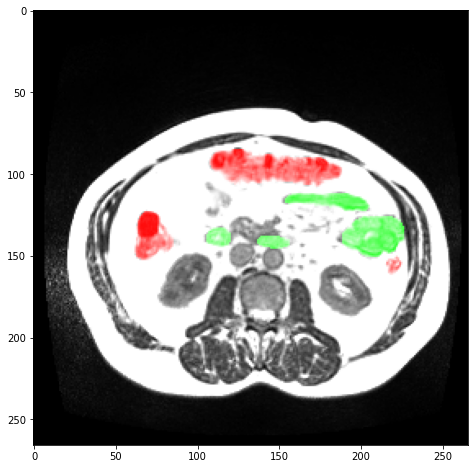

In [9]:

for i in range(5):
    img_path = random.choice(img_to_plot)
    img = cv2.imread(img_path, -1)
    mask = get_mask(img_path, pivot_df)
    try:
        plot_1d_img_3d_mask(img, mask)
    except:
        print("Mask was decoded wrongly")
        plot_1d_img_3d_mask(img, np.swapaxes(mask, 0, 1))